<h3 style='color:orange'>Wafer fault Prediction</h3>

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

<h3 style='color:orange'>Problem Statement</h3>

<h5 style='color:blue'><strong style='color:white'>Data:</strong> Wafers data</h5>



**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
plt.style.use('ggplot')

In [2]:
# Loading and preview the data
df = pd.read_csv('data/wafer_23012020_041211.csv')

In [3]:
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [4]:
# Check for shape of dataset
df.shape

(100, 592)

In [5]:
# Dropping column 'Unnamed: 0' and 'Good/Bad' and save the data as in test.csv
df.drop(columns = ["Unnamed: 0", 'Good/Bad']).iloc[:100].to_csv("test.csv", index = False)

In [6]:
# Replace column 'Unnamed: 0' with wafer
df.rename(columns={'Unnamed: 0':'wafer'},inplace=True)

<h3 style='color:orange'>Exploratory Data Analysis</h3>

In [7]:
# Looking for categories in target 
df['Good/Bad'].value_counts()

-1    94
 1     6
Name: Good/Bad, dtype: int64

In [8]:
# Cheh=ck for missing value target feature
df['Good/Bad'].isnull().sum()

0

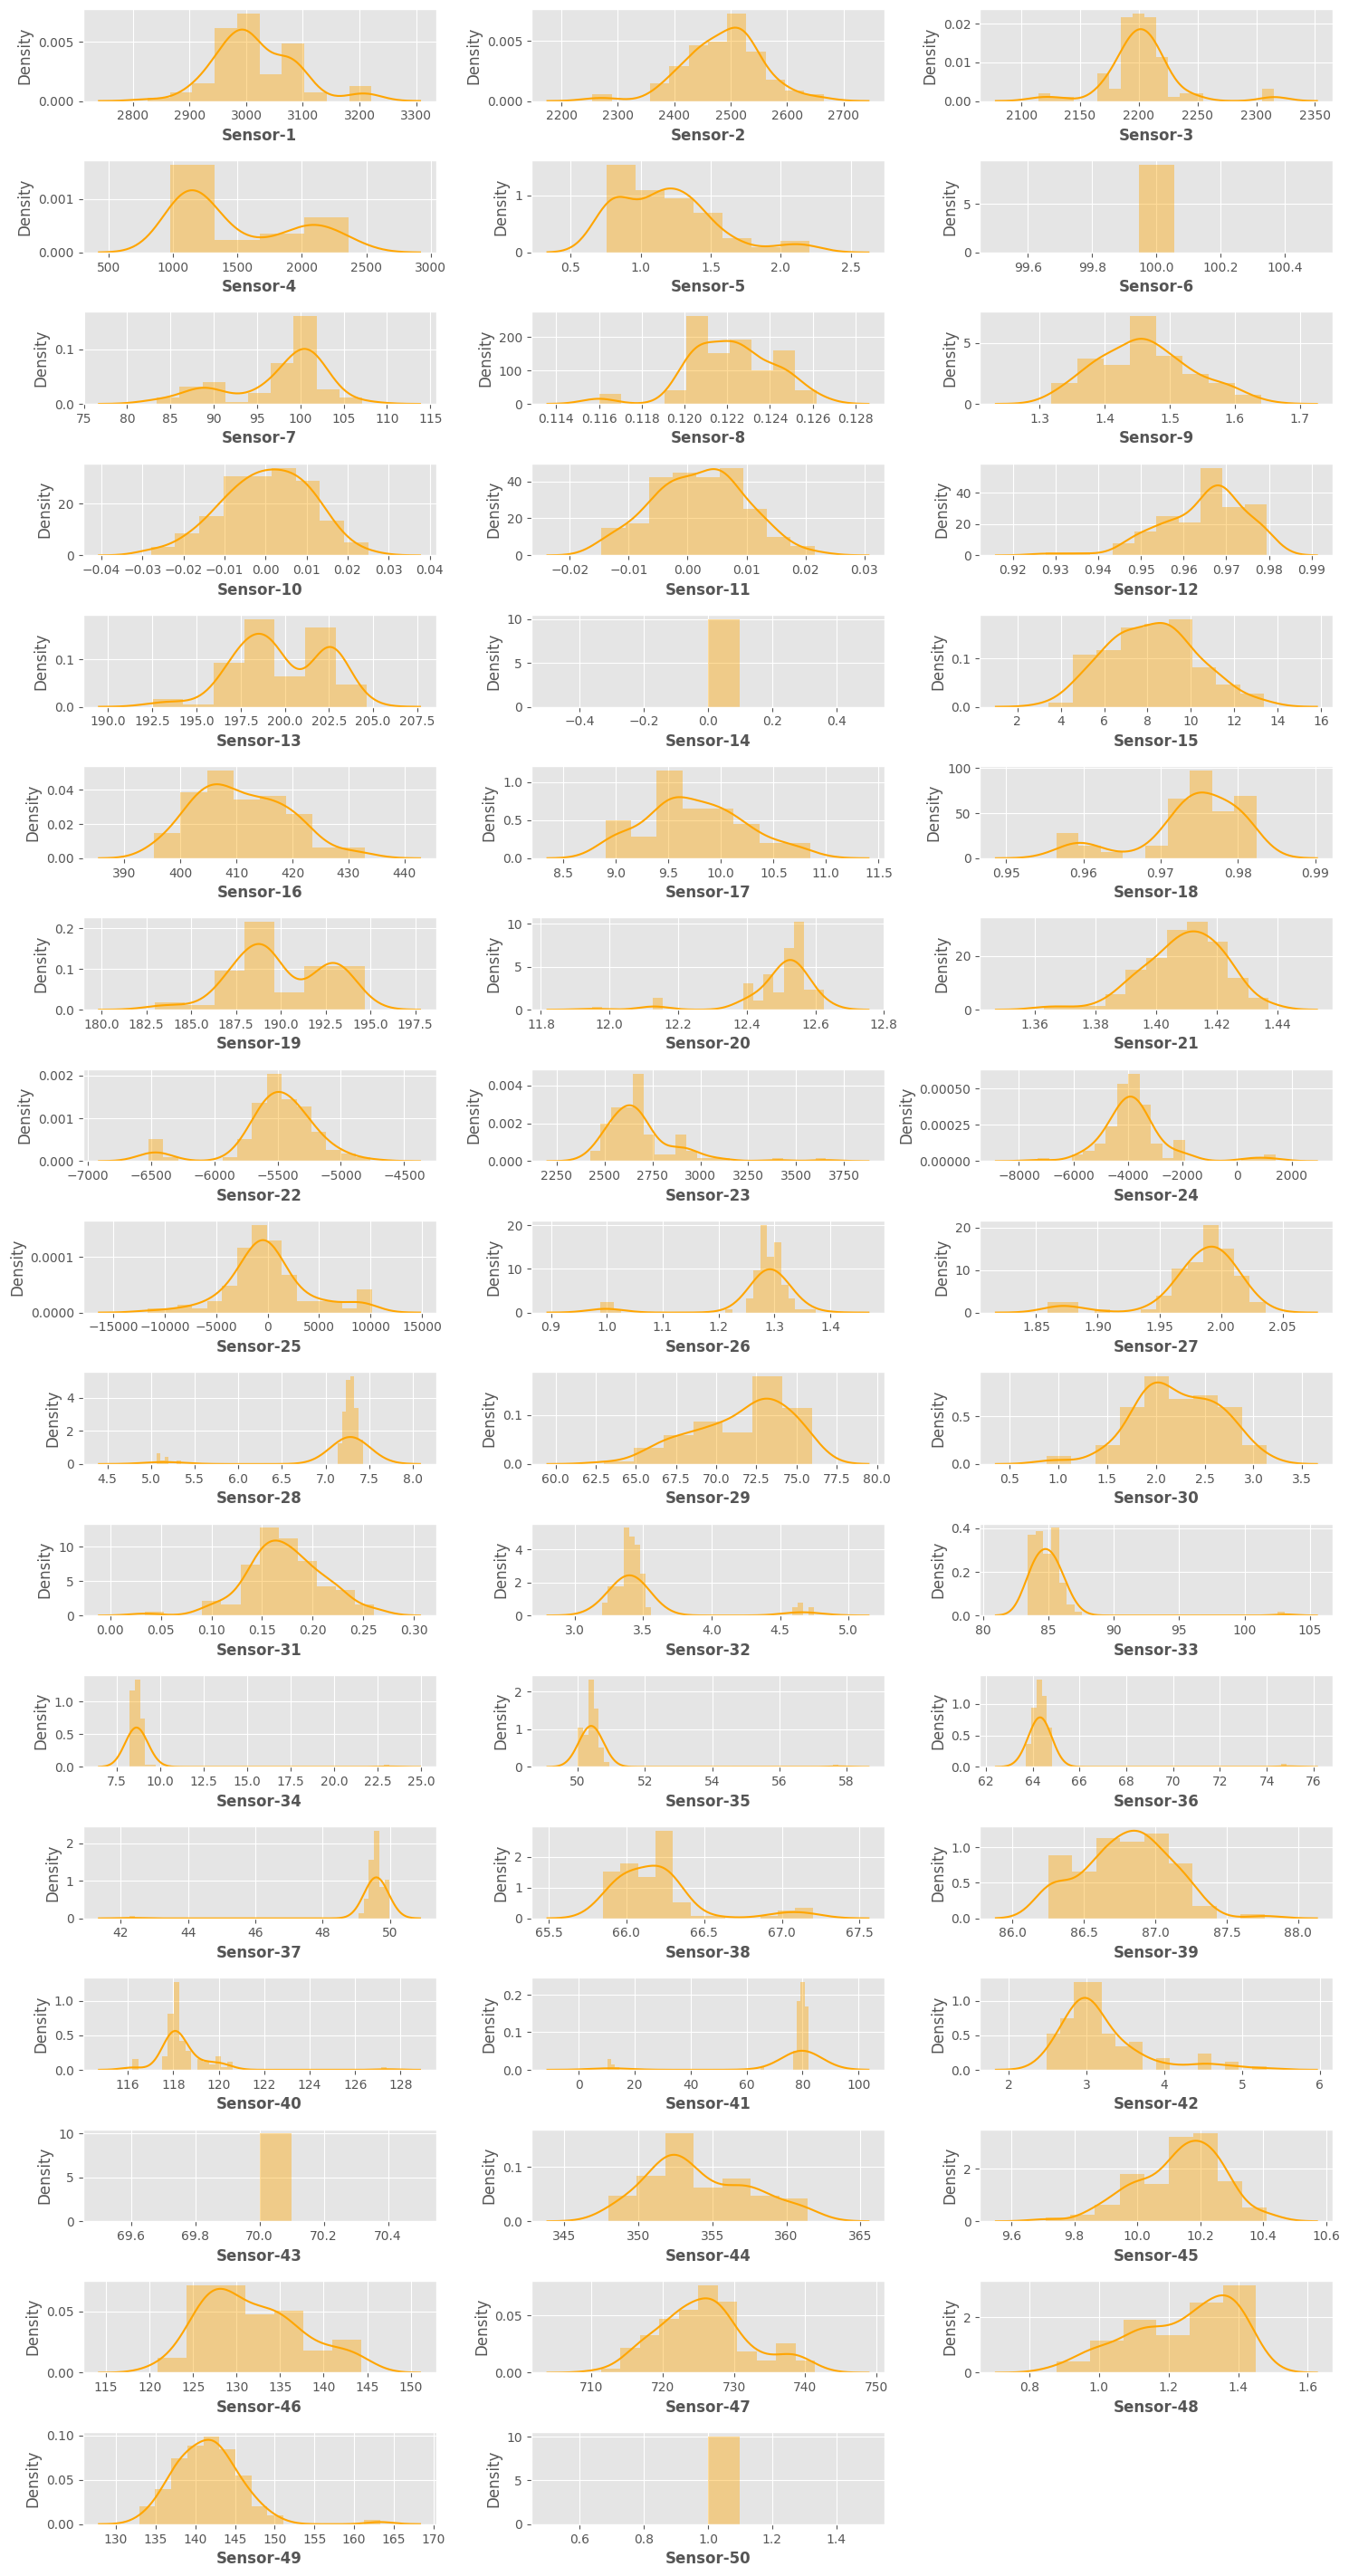

In [9]:
# Visualization of sensor distribution of first 50 sensor
plt.figure(figsize=(15,100))
for i, col in enumerate(df.columns[1:51]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=df[col],color='orange')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

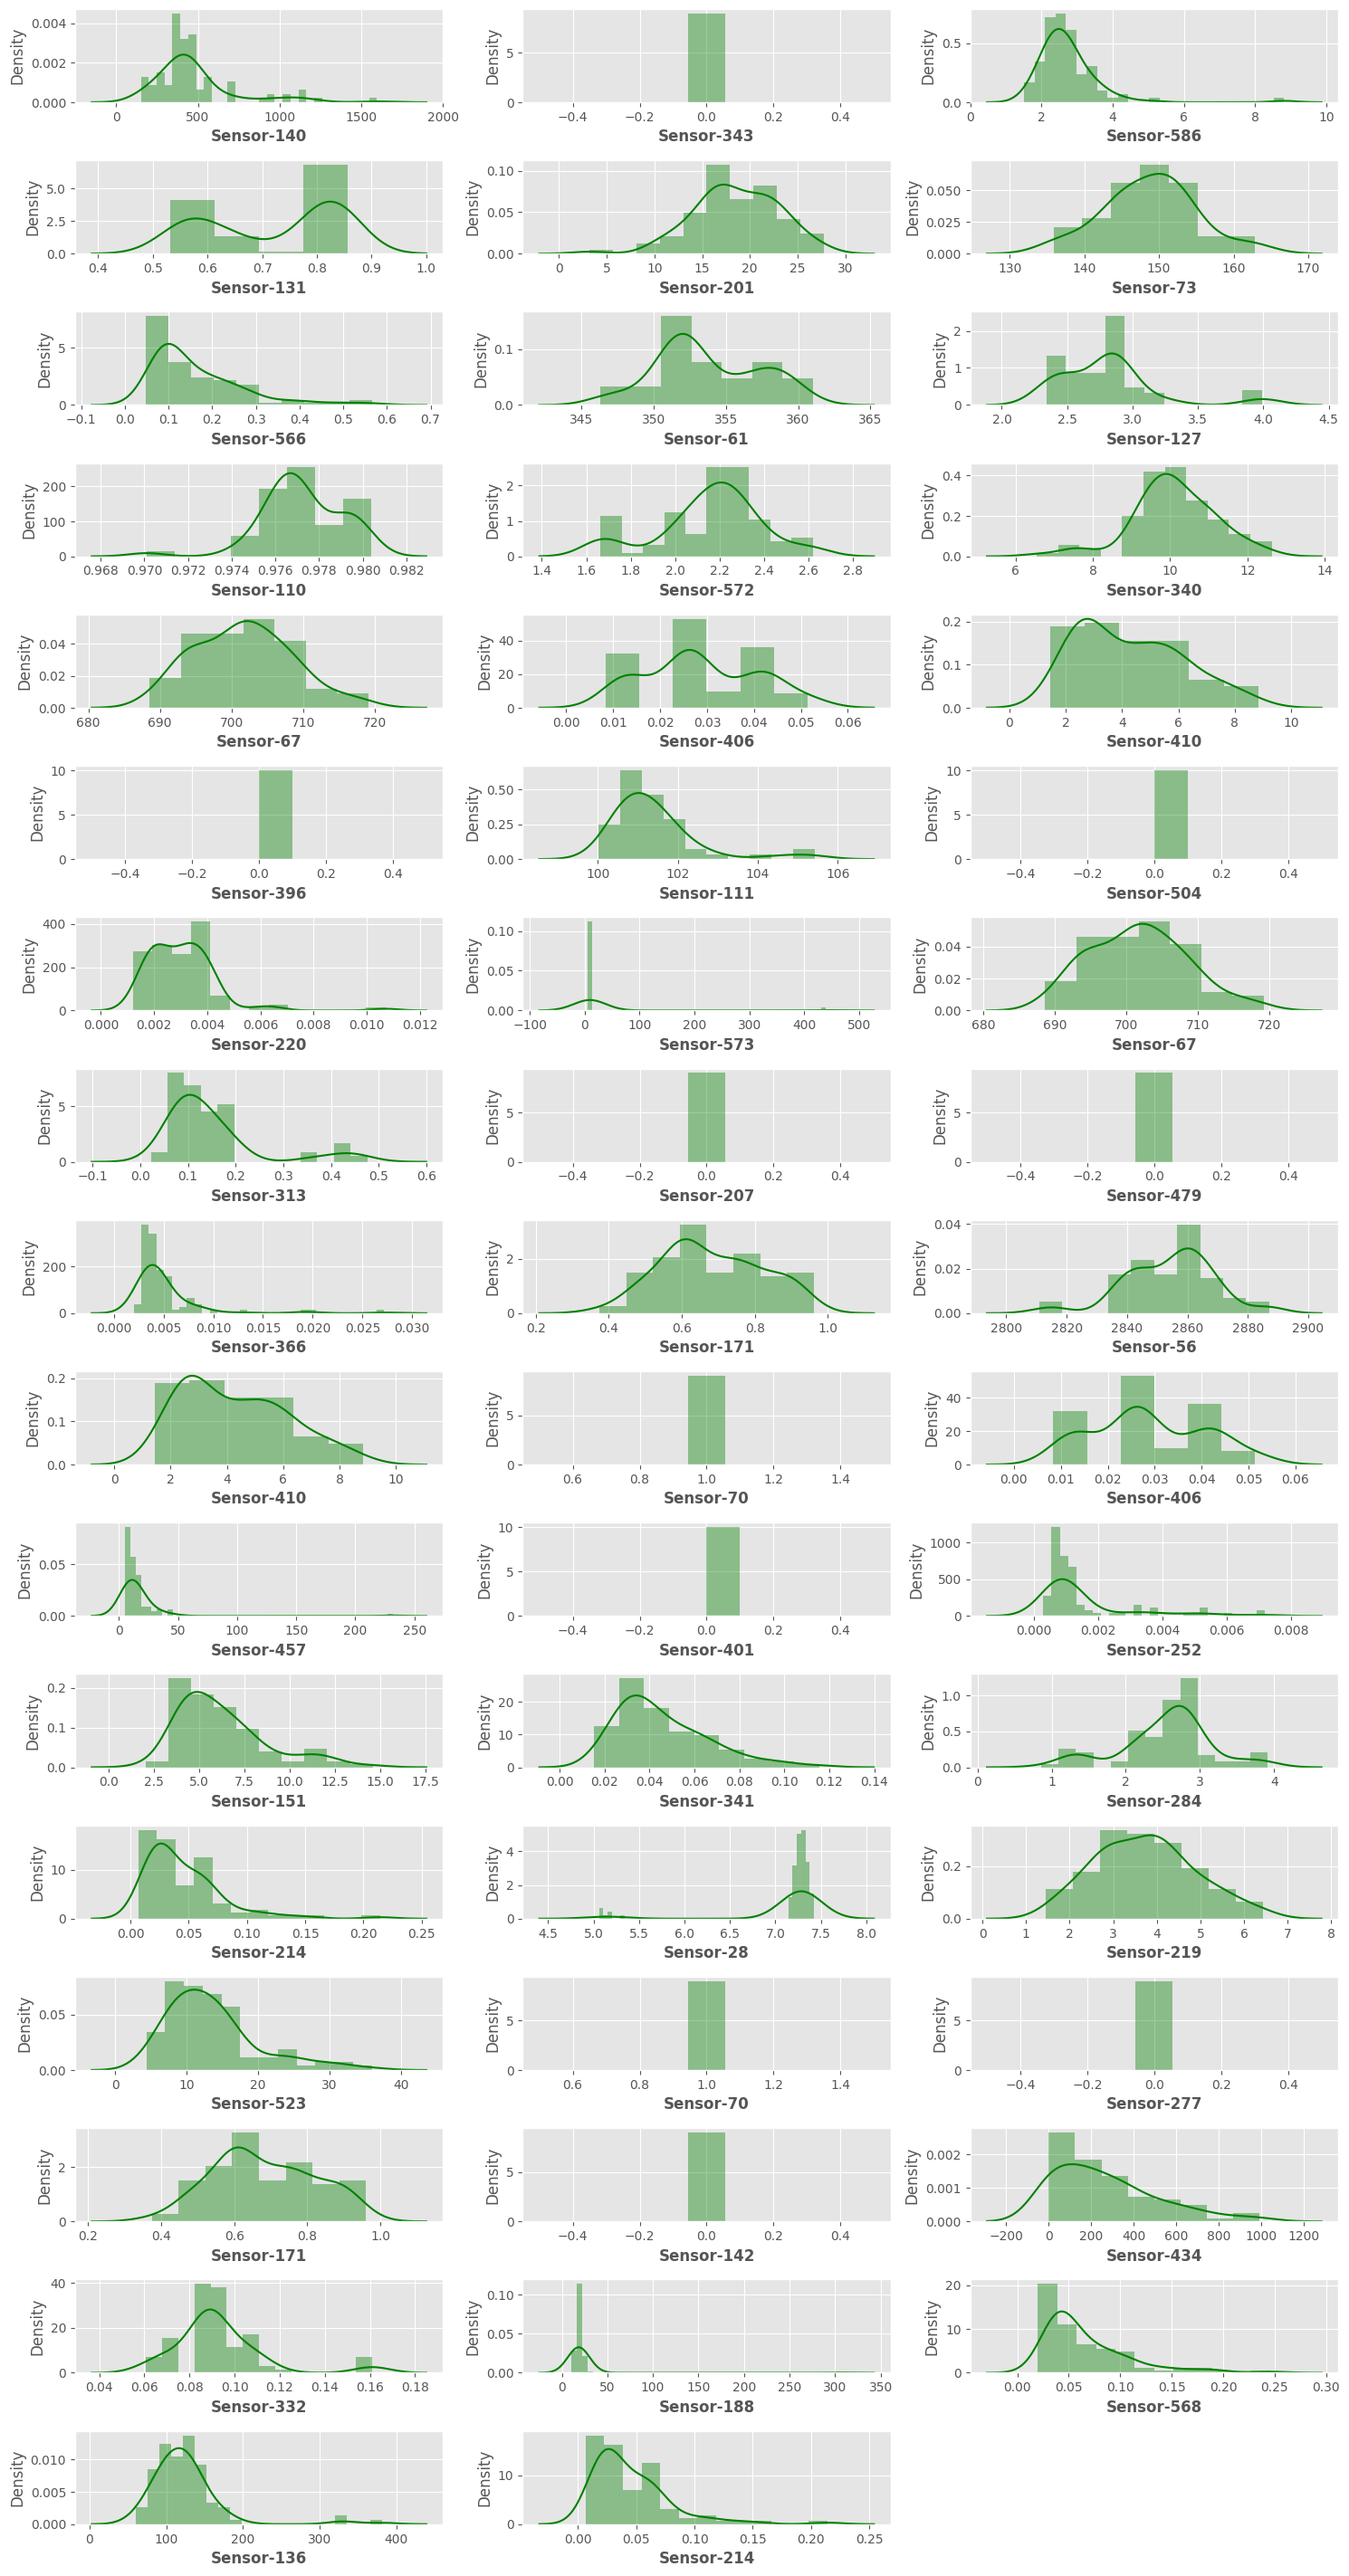

In [10]:
# Let's visualize the distribution of random 50 sensor
random_sensor = []
for i in range(50):
    if i not in random_sensor:
        random_sensor.append(np.random.randint(1,591))

# Code for plotting distribution of random sensor         
plt.figure(figsize=(15,100))
for i, col in enumerate(df.columns[random_sensor]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=df[col],color='green')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

In [11]:
# Dropping column with zero standard deviation
def get_col_with_zero_std(df:pd.DataFrame):
    '''
        Return list of column name who are having zero standard deviation
    '''
    columns_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O'] # return list of all the numerical columns
    for col in num_cols:
        if df[col].std() == 0:
            columns_to_drop.append(col)
    return columns_to_drop

def get_redundant_cols(df:pd.DataFrame,missing_threshold=.7):
    '''
        Return list of columns name having missing value more than threshold value .7 
    '''
    column_missing_ratios = df.isna().sum().div(df.shape[0])
    columns_to_drop = list(column_missing_ratios[column_missing_ratios>missing_threshold].index)
    return columns_to_drop

In [12]:
# columns with missing values more than threshold value 0.7
columns_to_drop1 = get_redundant_cols(df,missing_threshold=.7)
print(f'This is list of columns having missing value more than 70% {columns_to_drop1}')

This is list of columns having missing value more than 70% ['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']


In [13]:
# Columns with sta dev zero
columns_to_drop2 = get_col_with_zero_std(df)
print(f'We have {len(columns_to_drop2)} columns with zero std dev.')

We have 122 columns with zero std dev.


In [14]:
# Now we combine all the columns that is not going to contribute in ml
columns_to_drop = columns_to_drop1 + columns_to_drop2
print(f'We have total {len(columns_to_drop)} to drop.')

We have total 126 to drop.


In [15]:
# Separate feature and target or label out
X, y = df.drop(columns_to_drop, axis=1), df[["Good/Bad"]]
X = X.drop(columns=['wafer'],axis=1)

In [16]:
# check shape for feature variable
print(f"Shape of features: {X.shape}")

Shape of features: (100, 465)


In [17]:
# Check shape for target feature
print(f"Shape of features: {y.shape}")

Shape of features: (100, 1)


<h3 style='color:orange'>Data Transformation using pipeline</h3>

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(
    steps=[('Imputer',imputer),('Scaler',RobustScaler())]
)
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [19]:
# Transform our target feature
X_trans = preprocessing_pipeline.fit_transform(X)
print(f'Shape of transform features set:{X_trans.shape}')
X_trans

Shape of transform features set:(100, 465)


array([[-0.37110152, -0.21388855,  0.67805794, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       [-0.44644841,  0.15494872, -1.32959552, ...,  0.515625  ,
        -0.40093   ,  2.        ],
       [ 0.70070541,  0.08389967,  0.20530751, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.671875  ,
        -0.44021198,  0.        ],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.671875  ,
        -0.44021198,  0.        ],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.671875  ,
        -0.44021198,  2.        ]])

<h3 style='color:orange'>Shall we cluster 'Wafer' instances?</h3>

In [36]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple

In [21]:
# Model training 
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_trans)
    WCSS.append(kmeans.inertia_)
    print(f'WCSS for n_clusters={i}: {kmeans.inertia_}')

WCSS for n_clusters=1: 1503049.6472606931
WCSS for n_clusters=2: 512194.0849012661
WCSS for n_clusters=3: 185195.115933283
WCSS for n_clusters=4: 143033.25783274244
WCSS for n_clusters=5: 108688.31540145789
WCSS for n_clusters=6: 88439.04360341988
WCSS for n_clusters=7: 81079.41259322353
WCSS for n_clusters=8: 68622.79634876263
WCSS for n_clusters=9: 61805.44838121718
WCSS for n_clusters=10: 58870.60322516474


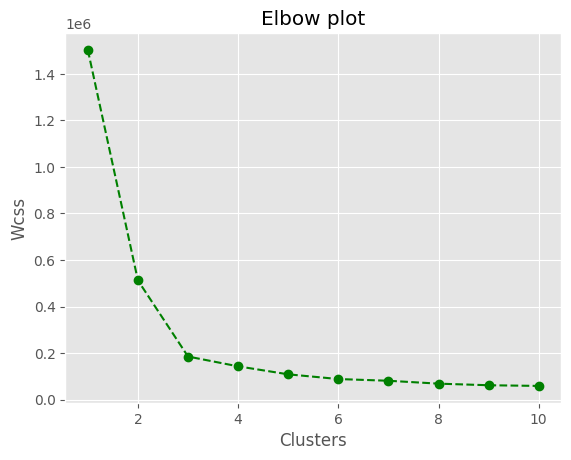

In [22]:
# plot elbow method just see what cluster we can choose 
plt.plot(range(1,11),WCSS,'go--')
plt.xlabel('Clusters')
plt.ylabel('Wcss')
plt.title('Elbow plot')
plt.show()

In [23]:
# Finding cluster value fo kmean with help of kneelocator
knee_finder = KneeLocator(range(1,11),WCSS,curve='convex',direction='decreasing')
print(f'You can choose {knee_finder.knee} value for cluster')

You can choose 3 value for cluster


<h3 style='color:orange'>Same code which is written above can we write in oops.</h3>

In [72]:
class ClusterWafer:
    def __init__(self, X: np.array, desc: str):
        '''
            Constructor
        '''
        self.X = X
        self.desc = desc
    
    def _get_ideal_number_of_cluster(self):
        '''
            Method that can find n_cluster value
        '''
        try:
            print(f'Getting ideal number of cluster for {self.desc}')
            WCSS = []
            for i in range(1,11):
                kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
                kmeans.fit(self.X)
                WCSS.append(kmeans.inertia_)
                print(f'WCSS for n_clusters={i}: {kmeans.inertia_}')
            print()
            # plotting elbow graph in order choose n_cluster for kmeans
            plt.figure(figsize=(5,4.5))
            plt.plot(range(1,11),WCSS,'go--')
            plt.xlabel('Clusters')
            plt.ylabel('Wcss')
            plt.title('Elbow plot')
            plt.show()
            # Finding cluster value fo kmean with help of kneelocator
            knee_locator = KneeLocator(range(1,11),WCSS,curve='convex',direction='decreasing')
            print()
            print(f'You can choose {knee_finder.knee} value for cluster')
            return knee_finder.knee
        except Exception as e:
            print(e)
            raise e
            
    def create_cluster(self) -> Tuple:
        '''
            Method for creating clusters of wafer
        '''
        try:
            n_cluster_wafer = self._get_ideal_number_of_cluster()
            kmeans = KMeans(n_clusters=n_cluster_wafer,init='k-means++',random_state=42)
            y_pred = kmeans.fit_predict(self.X)
            print()
            print(f'Wafer instance divided into {knee_finder.knee} clusters')
            print('Training completed successfully')
            return kmeans, np.c_[self.X,y_pred]
        except Exception as e:
            print(e)
            raise e 

Getting ideal number of cluster for Wafer cluster
WCSS for n_clusters=1: 1503049.6472606931
WCSS for n_clusters=2: 512194.0849012661
WCSS for n_clusters=3: 185195.115933283
WCSS for n_clusters=4: 143033.25783274244
WCSS for n_clusters=5: 108688.31540145789
WCSS for n_clusters=6: 88439.04360341988
WCSS for n_clusters=7: 81079.41259322353
WCSS for n_clusters=8: 68622.79634876263
WCSS for n_clusters=9: 61805.44838121718
WCSS for n_clusters=10: 58870.60322516474



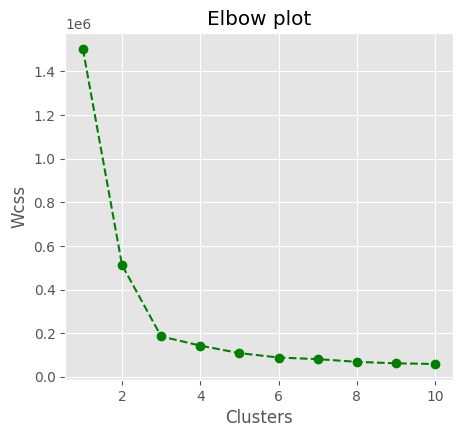


You can choose 3 value for cluster

Wafer instance divided into 3 clusters
Training completed successfully


In [73]:
cluster = ClusterWafer(X=X_trans,desc='Wafer cluster')
clusterer, X_clus = cluster.create_cluster()

In [49]:
print(f'clusters: {np.unique(X_clus[:,-1])}')

clusters: [0. 1. 2.]


In [52]:
# Let's have a look at their shapes
# Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus, y]

# luster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(96, 467)

In [55]:
# Cluster_2 data
wafers_clus[wafers_clus[:, -2] == 1].shape

(3, 467)

In [54]:
# Cluster_3 data
wafers_clus[wafers_clus[:, -2] == 2].shape

(1, 467)

Dividing wafer instance into clusters is not good idea because you can see our wafer instance is highly imbalanced.

<h3 style='color:orange'>Resampling of Training Instances</h3>

In [57]:
# %pip install imbalanced-learn

In [58]:
from imblearn.combine import SMOTETomek
# segregating feature into independent and dependent features
X,y = X_trans[:,:-1], y
resampler = SMOTETomek(sampling_strategy='auto')
X_res, y_res = resampler.fit_resample(X,y)

In [59]:
# checking for shape
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (100, 465)
After resampling, Shape of training instances:  (188, 465)


In [60]:
# Target after resampling
np.unique(y_res)

array([-1,  1], dtype=int64)

In [65]:
# value counts of target feature
print('Value Counts')
print(f'-1: {len(y_res[y_res==-1])}')
print(f' 1: {len(y_res[y_res==1])}')

Value Counts
-1: 188
 1: 188


<h3 style='color:orange'>Prepare the Test data set</h3>

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=1/3,random_state=42)

In [68]:
# Checking for shape
print(f'Train set: {X_train.shape,y_train.shape}')
print(f'Test set: {X_test.shape,y_test.shape}')

Train set: ((125, 464), (125, 1))
Test set: ((63, 464), (63, 1))


<h3 style='color:orange'>Model training and Model selection</h3>

In [69]:
# Importing Libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

In [70]:
# Creating instance or obj for models
svc_linear_clf = SVC(kernel='linear')
svc__rbf_clf = SVC(kernel='rbf')

random_clf = RandomForestClassifier(random_state=42)

xgboost_clf = XGBClassifier(objective='binary:logistic')

In [71]:
# creating function to display score for each model 
def display_score(score):
    '''
        Function for displaying scores of models
    '''
    print(f'Scores: {score}')
    print(f'Mean: {score.mean()}')
    print(f'Standard deviation: {score.std()}')

<h3 style='color:aqua'>Evaluating SVC(kernal='linear') Model with Cross-validation</h3>

In [74]:
svc_score = cross_val_score(svc_linear_clf,X_res,y_res,scoring='roc_auc',cv=10,verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [75]:
display_score(svc_score)

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0


<h3 style='color:aqua'>Evaluating SVC(kernal='rbf') Model with Cross-validation</h3>

In [76]:
svc_rbf_score = cross_val_score(svc__rbf_clf,X_res,y_res,scoring='roc_auc',cv=10,verbose=10)

[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [77]:
display_score(svc_rbf_score)

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0


<h3 style='color:aqua'>Evaluating RandomForestClassifier Model with Cross-validation</h3>

In [78]:
random_clf_score = cross_val_score(random_clf,X_res,y_res,scoring='roc_auc',cv=10,verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=1.000) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.5s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.8s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.4s remaining:    0.0s


[CV] END ................................ score: (test=1.000) total time=   0.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.7s finished


In [79]:
display_score(random_clf_score)

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0


In [84]:
# Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf, X_test, y_test, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_test, random_clf_preds)
random_clf_auc

1.0